# Maintenance Prediction Model

## 1. Importing liblaries and Loading the dataset

In [32]:
#importing Liblaries
import pandas as pd

#loading the dataset
df = pd.read_csv("C:/Users/Administrator/OneDrive/Desktop/Models/Maintenance Model/equipment_failure_data.csv")
df

,Timestamp,Temperature,Vibration,Pressure,EquipmentStatus
0,2022-01-01 00:00:00,27.483571,4.071065,1053.418967,Normal
1,2022-01-01 00:01:00,24.308678,0.660098,1030.206044,Normal
2,2022-01-01 00:02:00,28.238443,3.488205,1115.181938,Normal
3,2022-01-01 00:03:00,32.615149,1.109981,926.027789,Warning
4,2022-01-01 00:04:00,23.829233,8.082352,1062.961662,Normal
...,...,...,...,...,...
1995,2022-01-02 09:15:00,30.350751,2.832844,963.801763,Normal
1996,2022-01-02 09:16:00,24.867394,4.003128,967.782987,Normal
1997,2022-01-02 09:17:00,20.590627,8.118661,863.042990,Normal
1998,2022-01-02 09:18:00,24.184665,0.138621,1059.307274,Normal


## 2. Exploring the dataset

In [33]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        2000 non-null   object 
 1   Temperature      2000 non-null   float64
 2   Vibration        2000 non-null   float64
 3   Pressure         2000 non-null   float64
 4   EquipmentStatus  2000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 78.3+ KB
None
       Temperature    Vibration     Pressure
count  2000.000000  2000.000000  2000.000000
mean     25.225421     4.908381   998.086552
std       4.942328     2.869452    49.383463
min       8.793663     0.000116   841.164809
25%      21.886690     2.430530   965.625902
50%      25.223458     4.896343   998.954867
75%      28.414888     7.342049  1031.670519
max      44.263657     9.995577  1162.154648


## 3. Data Preparation

### (i) Separation of data as x and y

In [60]:
# separating the x and y variables

y = df["EquipmentStatus"]
y

0        Normal
1        Normal
2        Normal
3       Warning
4        Normal
         ...   
1995     Normal
1996     Normal
1997     Normal
1998     Normal
1999      Fault
Name: EquipmentStatus, Length: 2000, dtype: object

In [40]:
# Defining the x Features
X = df[['Temperature','Vibration', 'Pressure']]
X

,Temperature,Vibration,Pressure
0,27.483571,4.071065,1053.418967
1,24.308678,0.660098,1030.206044
2,28.238443,3.488205,1115.181938
3,32.615149,1.109981,926.027789
4,23.829233,8.082352,1062.961662
...,...,...,...
1995,30.350751,2.832844,963.801763
1996,24.867394,4.003128,967.782987
1997,20.590627,8.118661,863.042990
1998,24.184665,0.138621,1059.307274


### (ii) Spliting Data into Training data and Testing data

In [68]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

X_train

,Temperature,Vibration,Pressure
1260,27.791635,0.503495,868.759147
916,28.039483,1.793560,1034.523634
532,24.669601,7.365352,1047.889581
1159,23.375843,2.774647,1004.890665
1584,27.144083,6.618346,1027.484159
...,...,...,...
1879,20.970650,0.969657,1006.237605
1895,23.149945,3.993326,1037.257543
1859,26.301609,1.425566,929.652830
792,26.357894,8.891279,966.657564


In [55]:
y_train


1260     Normal
916      Normal
532     Warning
1159     Normal
1584     Normal
         ...   
1879     Normal
1895     Normal
1859    Warning
792      Normal
1544     Normal
Name: EquipmentStatus, Length: 1600, dtype: object

### (iii) Scale the features

In [86]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


## 4. Building and Training the Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=100)
classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=100)

## 5. Evaluating the Model's Performance

In [88]:
# importing the necessary liblaries for evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_predict = classifier.predict(X_test_scaled)


print(f'Accuracy: {accuracy_score(y_test, y_predict)}')

print('\nClassification Report:')
print(classification_report(y_test, y_predict))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_predict))


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

       Fault       0.00      0.00      0.00        21
      Normal       0.78      0.99      0.87       311
     Warning       0.20      0.01      0.03        68

    accuracy                           0.77       400
   macro avg       0.33      0.33      0.30       400
weighted avg       0.64      0.77      0.68       400


Confusion Matrix:
[[  0  21   0]
 [  0 307   4]
 [  0  67   1]]


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Model Interpretation and  Visualization

### (i) Scatter Plot of Pressure vs Temperature

#### - Also involves encoding the data in the EquipmentStatus Column into numerical values by use of label encoding

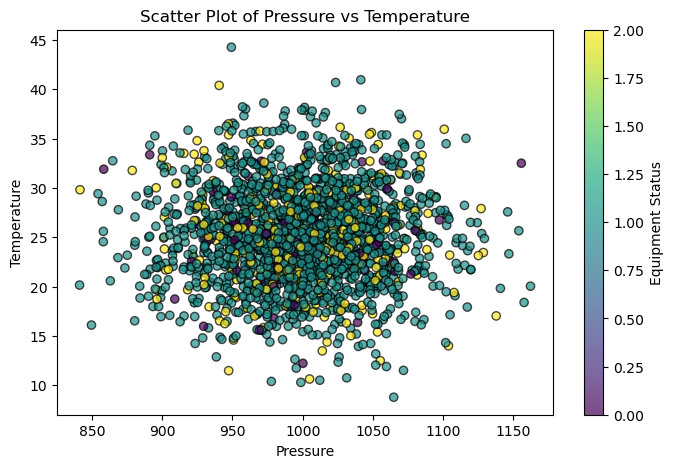

In [92]:
from sklearn.preprocessing import LabelEncoder

# label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Creating scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(X[top_features.index[0]], X[top_features.index[1]], c=y_encoded, cmap='viridis', edgecolors='k', alpha=0.7)
plt.colorbar(label='Equipment Status')
plt.title(f'Scatter Plot of {top_features.index[0]} vs {top_features.index[1]}')

plt.xlabel(top_features.index[0])

plt.ylabel(top_features.index[1])

plt.show()


### (ii) Scatter Plot of Vibration against Temperature with Equipment Status

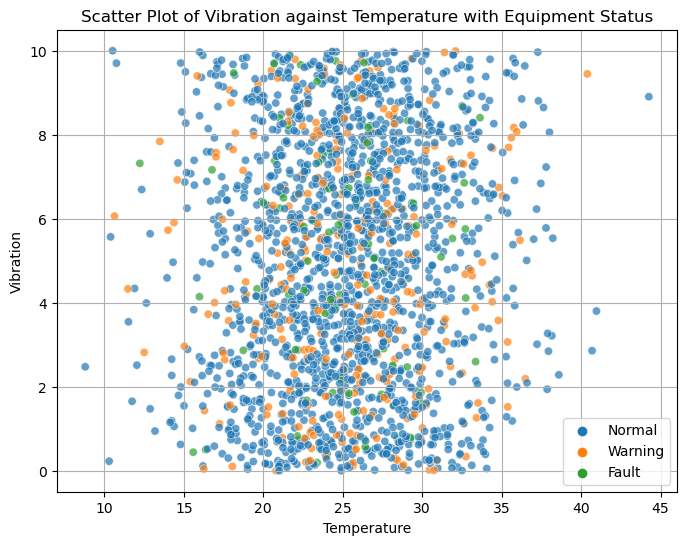

In [94]:
#importing the required liblaries
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))

# Getting the unique EquipmentStatus categories
equipment_status_categories = df['EquipmentStatus'].unique()

color_map = {status: sns.color_palette()[i] for i, status in enumerate(equipment_status_categories)}

#for  difference in color matching during plotting
sns.scatterplot(x='Temperature', y='Vibration', hue='EquipmentStatus', palette=color_map, data=df, alpha=0.7)

plt.title('Scatter Plot of Vibration against Temperature with Equipment Status')
plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.legend()
plt.grid(True)

plt.show()


### (iii) Scatter Plot of Vibration against Pressure with Equipment Status

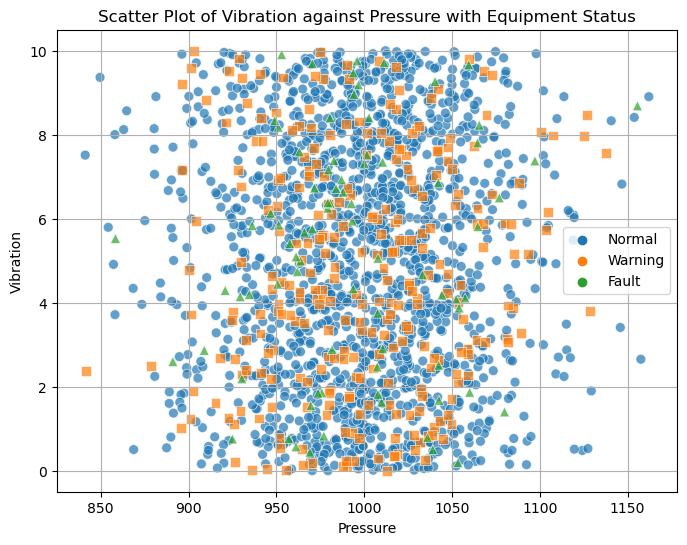

In [96]:

plt.figure(figsize=(8, 6))

# Getting unique EquipmentStatus categories
equipment_status_categories = df['EquipmentStatus'].unique()

# Creation of color map for different EquipmentStatus
color_map = {status: sns.color_palette()[i] for i, status in enumerate(equipment_status_categories)}

# Defining marker styles for each EquipmentStatus
marker_styles = {'Normal': 'o', 'Warning': 's', 'Fault': '^'}

# Scatter plot with custom marker styles, colors, and sizes
for status in equipment_status_categories:
    subset = df[df['EquipmentStatus'] == status]
    sns.scatterplot(x='Pressure', y='Vibration', hue='EquipmentStatus', palette=color_map, 
                    data=subset, alpha=0.7, s=50, marker=marker_styles[status])

plt.title('Scatter Plot of Vibration against Pressure with Equipment Status')
plt.xlabel('Pressure')
plt.ylabel('Vibration')
plt.legend()
plt.grid(True)

plt.show()


### (iv) Combining Temperature, Pressure and Vibration with Equipment Status in a 3D Scatter Plot

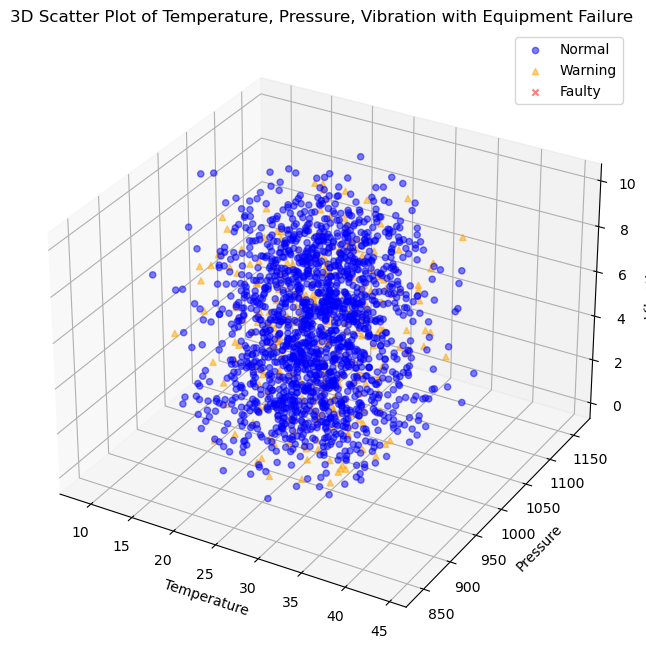

In [98]:
from mpl_toolkits.mplot3d import Axes3D

# Converting the column's data to numerical values
df_cleaned[['Temperature', 'Pressure', 'Vibration']] = df_cleaned[['Temperature', 'Pressure', 'Vibration']].astype(float)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for normal operation
ax.scatter(df_cleaned[df_cleaned['EquipmentStatus'] == 'Normal']['Temperature'],
           df_cleaned[df_cleaned['EquipmentStatus'] == 'Normal']['Pressure'],
           df_cleaned[df_cleaned['EquipmentStatus'] == 'Normal']['Vibration'],
           label='Normal', alpha=0.5, color='blue', marker='o')

# Scatter plot for warning
ax.scatter(df_cleaned[df_cleaned['EquipmentStatus'] == 'Warning']['Temperature'],
           df_cleaned[df_cleaned['EquipmentStatus'] == 'Warning']['Pressure'],
           df_cleaned[df_cleaned['EquipmentStatus'] == 'Warning']['Vibration'],
           label='Warning', alpha=0.5, color='orange', marker='^')

# Scatter plot for faulty
ax.scatter(df_cleaned[df_cleaned['EquipmentStatus'] == 'Faulty']['Temperature'],
           df_cleaned[df_cleaned['EquipmentStatus'] == 'Faulty']['Pressure'],
           df_cleaned[df_cleaned['EquipmentStatus'] == 'Faulty']['Vibration'],
           label='Faulty', alpha=0.5, color='red', marker='x')

ax.set_xlabel('Temperature')
ax.set_ylabel('Pressure')
ax.set_zlabel('Vibration')
ax.set_title('3D Scatter Plot of Temperature, Pressure, Vibration with Equipment Failure')
ax.legend()

plt.show()


## 7. Saving the Model using JobLib

In [99]:

from joblib import dump

dump(classifier, 'equipment_failure_model.joblib')


['equipment_failure_model.joblib']